<a href="https://colab.research.google.com/github/jiku100/2020-2-machine-running-proejct/blob/master/assignment7/%EC%8B%A0%EC%84%9D%EA%B2%BD_assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cluster**

# 1. Load Data
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values
print(data.shape)
print(f"{data[0][0]} {data[0][1]}")

(200, 2)
15 39


In [2]:
X = data[:, 0]
Y = data[:, 1]
Z = data
print(X.shape)
print(Y.shape)
print(Z.shape)

(200,)
(200,)
(200, 2)


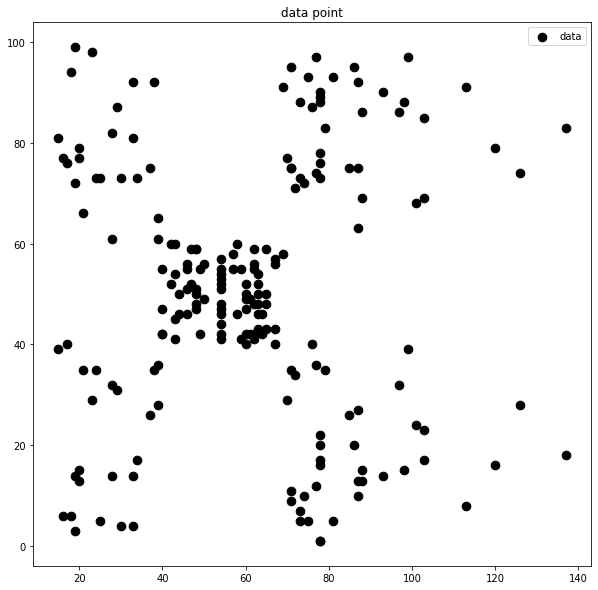

In [3]:
plt.figure(1, figsize=(10,10))
plt.scatter(X,Y, s= 75, c="k", label="data")
plt.title("data point")
plt.legend()
plt.show()

# 2. Implement function
<hr>

In [4]:
def compute_distance(a, b):

    dist = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

    return dist

def compute_centroid(Z):

    center = np.mean(Z, axis = 0) #centroid of a set of points in P#
    
    return center

def compute_label(z, M):

    distance = list(map(lambda x: compute_distance(z, x), M))
    label = np.argmin(distance)   #label of point z with a set of centroids M#
    
    return label

def compute_loss(C, M):
    n = 0
    loss = 0
    for i in range(len(C)):
      idx = (C[:,0]==i)
      C_idx = C[idx]
      for z in C_idx:
        loss += compute_distance(z[1:], M[i])
        n += 1
    loss = 1/n * loss

    return loss


## Test Code
test_z1 = np.array([2,5])
test_z2 = np.array([5,1])
print(f"Compute_distance test: {compute_distance(test_z1, test_z2)}")

test_Z = np.array([test_z1, test_z2])
print(f"Compute_centroid test: {compute_centroid(test_Z)}")

test_z3 = np.array([1,1])
test_M = np.array([[5,1], [2,4], [2,2]])
print(f"Compute_label test: {compute_label(test_z3, test_M)}")

test_C = np.array([[0,1,2],[1,2,3],[2,3,4],[1,4,5],[0,5,6],[2,6,7]])
print(test_C.shape)
print(f"Compute_loss test: {compute_loss(test_C, test_M)}")

Compute_distance test: 5.0
Compute_centroid test: [3.5 3. ]
Compute_label test: 2
(6, 3)
Compute_loss test: 3.4997276363416816


# 3. Initialize Cluster
<hr>

In [5]:
K = 5

In [6]:
C_idx = np.random.randint(0,5,200)[:,None]
C_init = np.hstack((C_idx, data))
print(C_init.shape)
print(C_init[:5])

(200, 3)
[[ 0 15 39]
 [ 0 15 81]
 [ 4 16  6]
 [ 1 16 77]
 [ 2 17 40]]


In [7]:
M_init = []
for i in range(K):
  idx = (C_init[:,0] == i)
  C_sub = C_init[idx]
  M_init.append(compute_centroid(C_sub[:, 1:]))
M_init = np.array(M_init)

In [8]:
colors = ["r", "b", "g", "aqua", "fuchsia"]
labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]
def plot_cluster(title, C, M):
  plt.figure(figsize=(10,10))
  for i in range(K):
    idx = (C[:, 0] == i)
    C_sub = C[idx]
    plt.scatter(C_sub[:, 1], C_sub[:,2], s = 75, c=colors[i], label=labels[i])
  plt.scatter(M[:, 0], M[:, 1], marker = "+", s = 150, c='k', label="Centroids")
  plt.title(title, fontsize=25)
  plt.legend()
  plt.show()

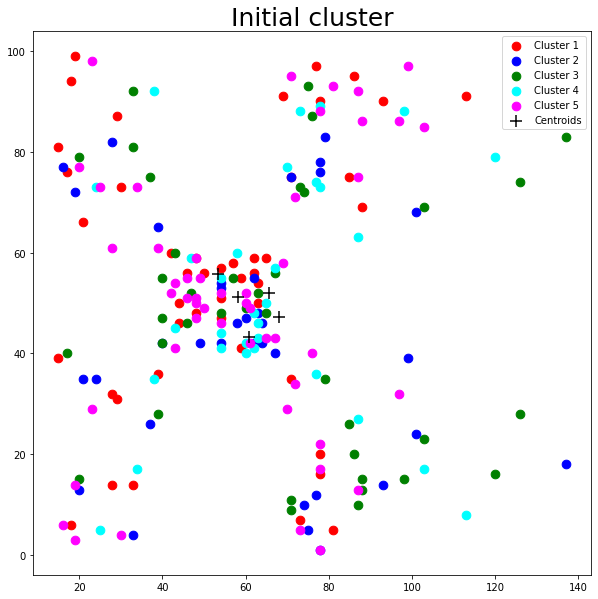

In [9]:
plot_cluster("Initial cluster", C_init, M_init)

# 4. Optimization
<hr>

In [10]:
K = 5
iter = 20
center1_distance = []
center2_distance = []
center3_distance = []
center4_distance = []
center5_distance = []
L_iters = []

In [11]:
def optim_label(C, M):
  for z in C:
    label = compute_label(z[1:], M)
    z[0] = label

def optim_center(C, M):
  for i in range(K):
    idx = (C[:,0] == i)
    C_sub = C[idx]
    M[i] = compute_centroid(C_sub[:, 1:])

In [12]:
C = np.array(C_init)
M = np.array(M_init)
for i in range(iter):
  loss = compute_loss(C, M)
  L_iters.append(loss)
  center1_distance.append(compute_distance(M[0], [0,0]))
  center2_distance.append(compute_distance(M[1], [0,0]))
  center3_distance.append(compute_distance(M[2], [0,0]))
  center4_distance.append(compute_distance(M[3], [0,0]))
  center5_distance.append(compute_distance(M[4], [0,0]))
  optim_label(C, M)
  optim_center(C,M)

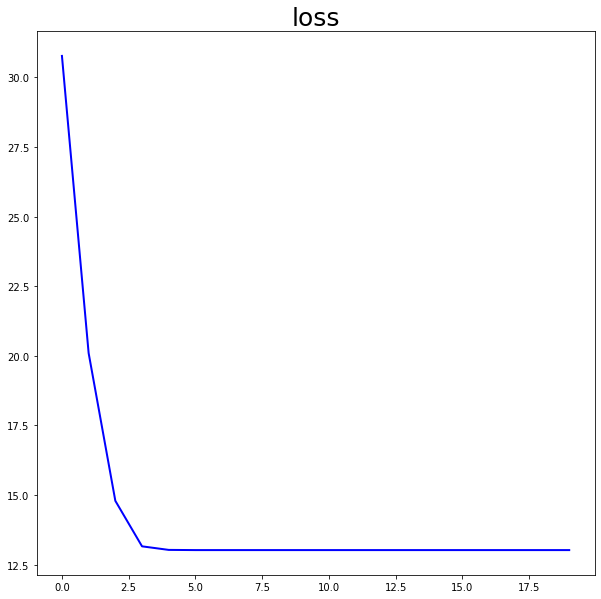

In [13]:
plt.figure(3, figsize=(10,10))
plt.plot(L_iters, linewidth = 2, c = "b")
plt.title("loss", fontsize=25)
plt.show()

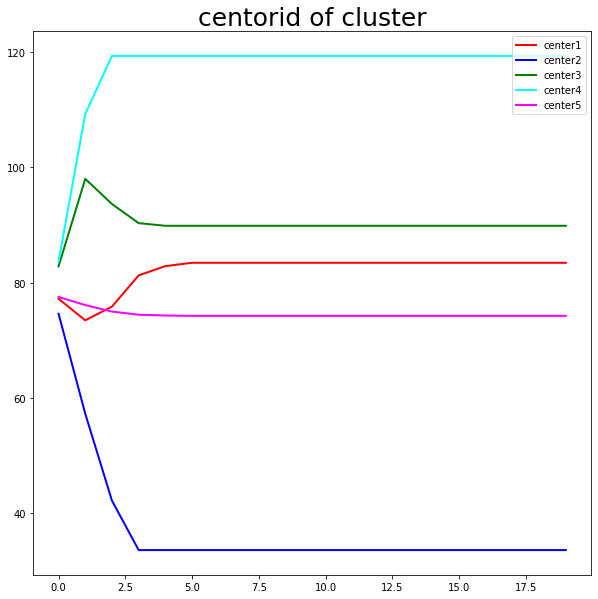

In [14]:
plt.figure(4, figsize=(10,10))
plt.plot(range(20), center1_distance, linewidth = 2, c = "r", label="center1")
plt.plot(range(20), center2_distance, linewidth = 2, c = "b", label="center2")
plt.plot(range(20), center3_distance, linewidth = 2, c = "g", label="center3")
plt.plot(range(20), center4_distance, linewidth = 2, c = "aqua", label="center4")
plt.plot(range(20), center5_distance, linewidth = 2, c = "fuchsia", label="center5")
plt.title("centorid of cluster", fontsize=25)
plt.legend(loc = 'upper right')
plt.show()

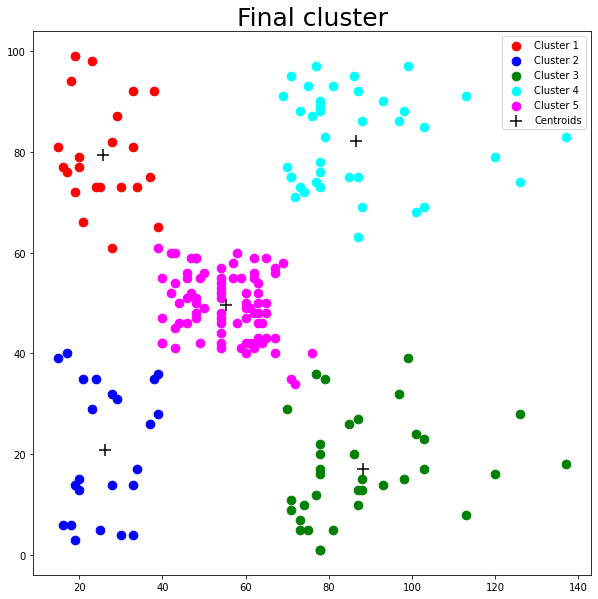

In [15]:
plot_cluster("Final cluster", C, M)

# 5. Output
<hr>

## 1. Plot the data points

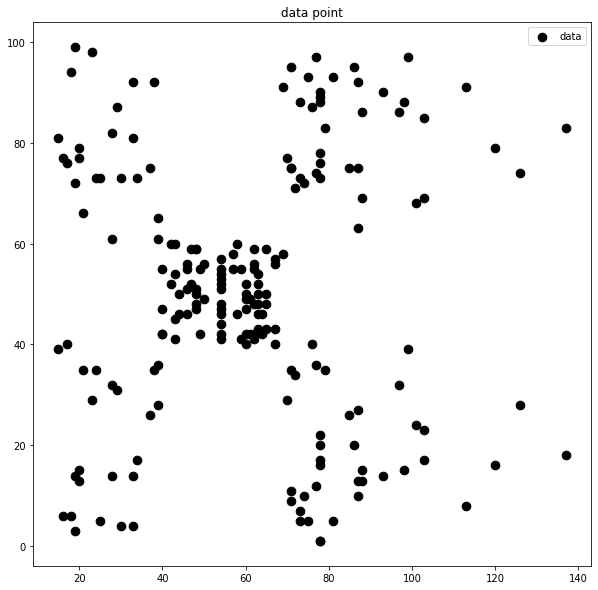

In [16]:
plt.figure(1, figsize=(10,10))
plt.scatter(X,Y, s= 75, c="k", label="data")
plt.title("data point")
plt.legend()
plt.show()

## 2. Visualize the initial condition of the point labels


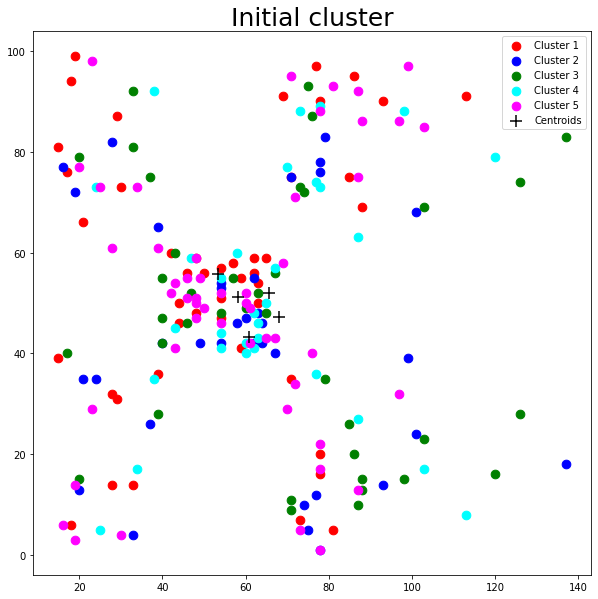

In [17]:
plot_cluster("Initial cluster", C_init, M_init)

## 3. Plot the loss curve

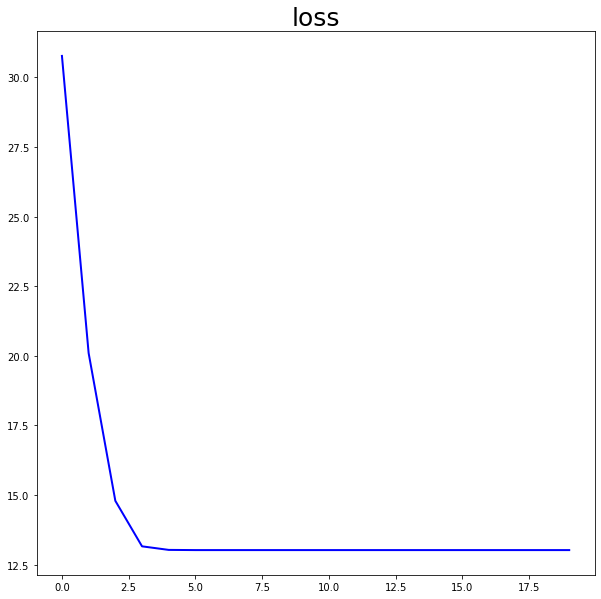

In [18]:
plt.figure(3, figsize=(10,10))
plt.plot(L_iters, linewidth = 2, c = "b")
plt.title("loss", fontsize=25)
plt.show()

## 4. Plot the centroid of each clsuter

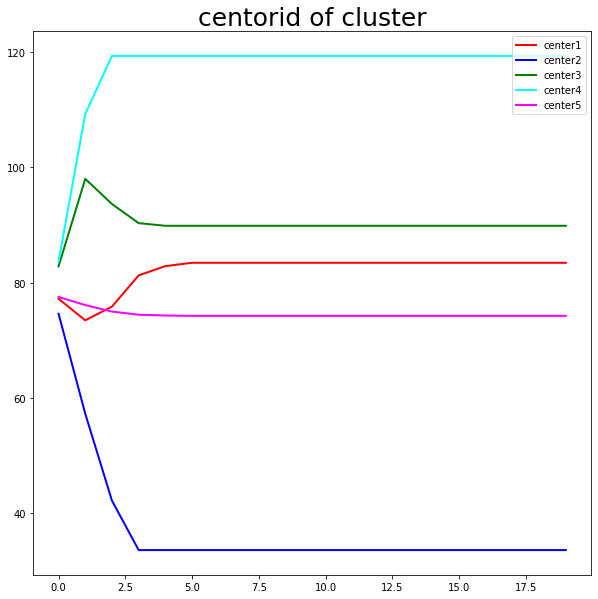

In [19]:
plt.figure(4, figsize=(10,10))
plt.plot(range(20), center1_distance, linewidth = 2, c = "r", label="center1")
plt.plot(range(20), center2_distance, linewidth = 2, c = "b", label="center2")
plt.plot(range(20), center3_distance, linewidth = 2, c = "g", label="center3")
plt.plot(range(20), center4_distance, linewidth = 2, c = "aqua", label="center4")
plt.plot(range(20), center5_distance, linewidth = 2, c = "fuchsia", label="center5")
plt.title("centorid of cluster", fontsize=25)
plt.legend(loc = 'upper right')
plt.show()

## 5. Plot the final clustering result

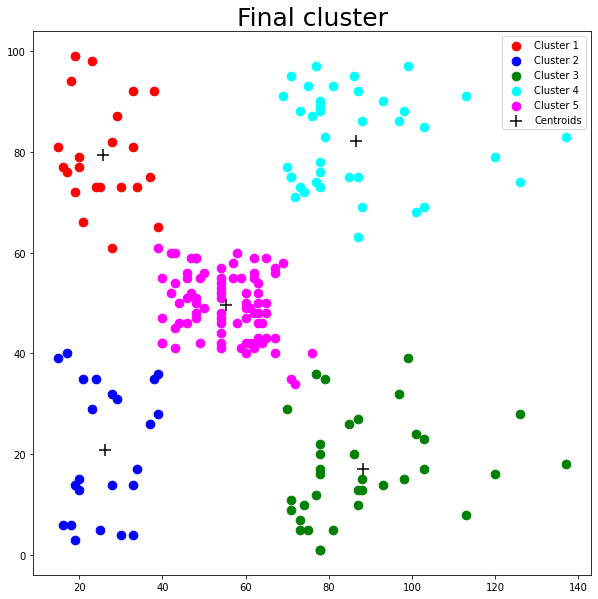

In [20]:
plot_cluster("Final cluster", C, M)